In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("./insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


categoricals :
- sex
- smoker
- region

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


D:\Temp\ipykernel_12868\3331501386.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


<AxesSubplot: xlabel='age', ylabel='Density'>

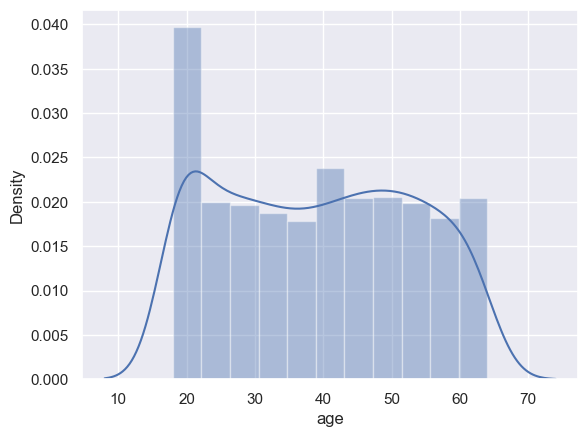

In [6]:
import seaborn as sns
sns.set()
sns.distplot(df["age"])

<AxesSubplot: xlabel='sex', ylabel='count'>

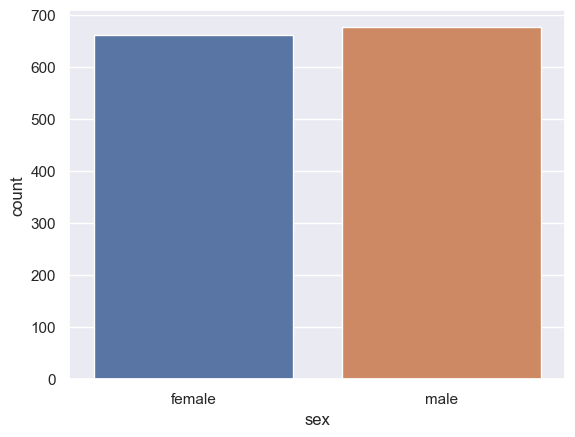

In [7]:
sns.countplot(x="sex",data=df)

D:\Temp\ipykernel_12868\2420122515.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.bmi)


<AxesSubplot: xlabel='bmi', ylabel='Density'>

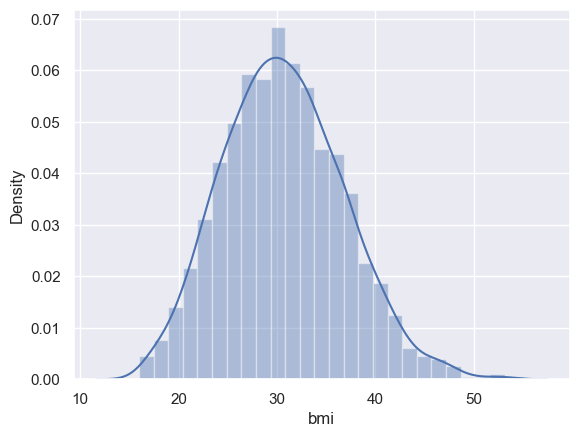

In [8]:
sns.distplot(df.bmi)

<AxesSubplot: xlabel='children', ylabel='count'>

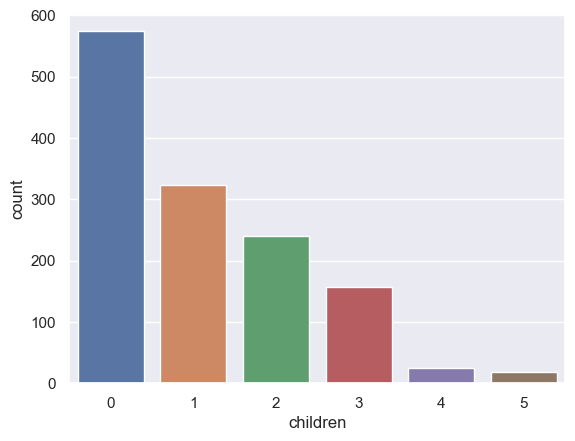

In [9]:
sns.countplot(data=df,x="children")

<AxesSubplot: xlabel='smoker', ylabel='count'>

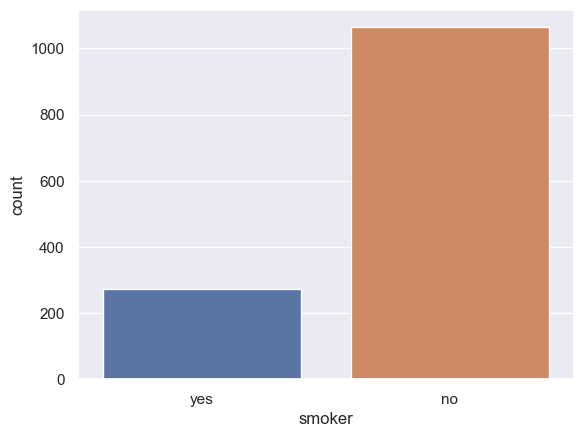

In [10]:
sns.countplot(x="smoker",data=df)

<AxesSubplot: xlabel='region', ylabel='count'>

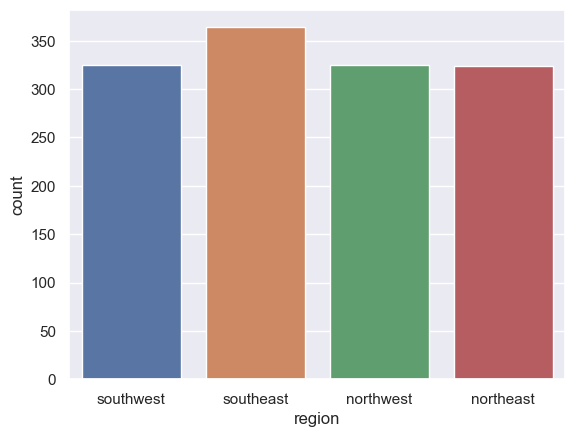

In [11]:
sns.countplot(x="region",data=df)

In [12]:
x=df.drop("charges",axis=1)
y=df["charges"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
x_train

,age,sex,bmi,children,smoker,region
1323,42,female,40.370,2,yes,southeast
380,27,female,17.955,2,yes,northeast
1239,25,female,42.130,1,no,southeast
1267,24,male,31.065,0,yes,northeast
1184,23,female,28.490,1,yes,southeast
...,...,...,...,...,...,...
344,49,female,41.470,4,no,southeast
725,30,female,39.050,3,yes,southeast
384,44,male,22.135,2,no,northeast
1185,45,male,23.560,2,no,northeast


In [14]:
from catboost import CatBoostRegressor
cat=CatBoostRegressor(iterations=200,learning_rate=0.05,depth=2,eval_metric="R2")
a=cat.fit(x_train,y_train,[1,4,5],eval_set=(x_test,y_test),plot=True)

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0664617	test: 0.0608617	best: 0.0608617 (0)	total: 165ms	remaining: 32.8s
1:	learn: 0.1286236	test: 0.1292553	best: 0.1292553 (1)	total: 176ms	remaining: 17.4s
2:	learn: 0.1876533	test: 0.1939558	best: 0.1939558 (2)	total: 186ms	remaining: 12.2s
3:	learn: 0.2427057	test: 0.2539327	best: 0.2539327 (3)	total: 208ms	remaining: 10.2s
4:	learn: 0.2886883	test: 0.2987303	best: 0.2987303 (4)	total: 221ms	remaining: 8.61s
5:	learn: 0.3302324	test: 0.3391783	best: 0.3391783 (5)	total: 235ms	remaining: 7.6s
6:	learn: 0.3727575	test: 0.3846130	best: 0.3846130 (6)	total: 250ms	remaining: 6.9s
7:	learn: 0.4076021	test: 0.4225598	best: 0.4225598 (7)	total: 263ms	remaining: 6.32s
8:	learn: 0.4390570	test: 0.4522889	best: 0.4522889 (8)	total: 276ms	remaining: 5.85s
9:	learn: 0.4690901	test: 0.4813656	best: 0.4813656 (9)	total: 289ms	remaining: 5.49s
10:	learn: 0.4994755	test: 0.5138839	best: 0.5138839 (10)	total: 300ms	remaining: 5.15s
11:	learn: 0.5253747	test: 0.5421241	best: 0.5421241 (

In [21]:
x_train

,age,sex,bmi,children,smoker,region
1323,42,female,40.370,2,yes,southeast
380,27,female,17.955,2,yes,northeast
1239,25,female,42.130,1,no,southeast
1267,24,male,31.065,0,yes,northeast
1184,23,female,28.490,1,yes,southeast
...,...,...,...,...,...,...
344,49,female,41.470,4,no,southeast
725,30,female,39.050,3,yes,southeast
384,44,male,22.135,2,no,northeast
1185,45,male,23.560,2,no,northeast


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import r2_score
step1=ColumnTransformer([("",OneHotEncoder(),[1,4,5])],remainder="passthrough")
lr=LinearRegression()
svr=LinearSVR()
gbr=GradientBoostingRegressor()
step2=StackingRegressor([("lr",lr),("svt",svr),("gbr",gbr)])
pipe=Pipeline([("step1",step1),("step2",step2)])
pipe.fit(x_train,y_train)
ypred=pipe.predict(x_test)
r2_score(y_test,ypred)

0.8561847753323374